In [15]:
from utils import *

In [24]:
nodeLabels = []
def createDistanceMatrix():
    df = pd.read_csv('Dados/snapshots_independent.csv', usecols=['REF','P1','P2','P3','P4','P5','P6',
                                                                 'P7','P8','P9','P10','P11','P12'])
    df.dropna(inplace = True)
    
    alsfrsList = []
    nodeLabels = []
    for i in df.index:
        l = list(df.loc[i])
        if l[0] not in nodeLabels:
            nodeLabels.append(l[0])
            l.pop(0)
            alsfrsList.append(l)
            
    listSize = len(alsfrsList)
    matrixSize = listSize*listSize
    print(matrixSize)
    distanceMatrix = np.array([0.0]*matrixSize).reshape(listSize,listSize)
    
    G=nx.Graph()
    for i in nodeLabels:
        G.add_node(i)
    
    for i in range(listSize):
        for j in range(listSize):
            similarity = cosine_similarity([alsfrsList[i]], [alsfrsList[j]])[0][0]
            distanceMatrix[i][j] = similarity
            if similarity > 0.95 and i!=j and not G.has_edge(nodeLabels[j], nodeLabels[i]):
                G.add_edge(nodeLabels[i], nodeLabels[j])
        
    return distanceMatrix, G
    
#st = time.time()
distanceMatrix, G = createDistanceMatrix()
#et = time.time()
#elapsed_time = et - st
#print('Execution time:', elapsed_time, 'seconds')

2149156


In [10]:
#distanceMatrix = binaryToData('distanceMatrix_PT_S1_cosine.pickle')
#G = binaryToData('net_PT_S1_cosine_95.pickle')

In [30]:
print(distanceMatrix)
#dataToBinary(distanceMatrix, 'distanceMatrix_PT_S1_cosine.pickle')
#dataToBinary(nodeLabels, 'nodeLabels_PT_S1_cosine.pickle')
#dataToBinary(G, 'net_PT_S1_cosine_95.pickle')

[[1.         0.76041282 0.947982   ... 0.98384    0.83319558 0.95692307]
 [0.76041282 1.         0.82793953 ... 0.78004736 0.6008016  0.80817931]
 [0.947982   0.82793953 1.         ... 0.93119969 0.90642326 0.96186517]
 ...
 [0.98384    0.78004736 0.93119969 ... 1.         0.7823005  0.96708402]
 [0.83319558 0.6008016  0.90642326 ... 0.7823005  1.         0.81206897]
 [0.95692307 0.80817931 0.96186517 ... 0.96708402 0.81206897 1.        ]]


Graph with 1466 nodes and 482280 edges
Average degree: 657.9536152796726


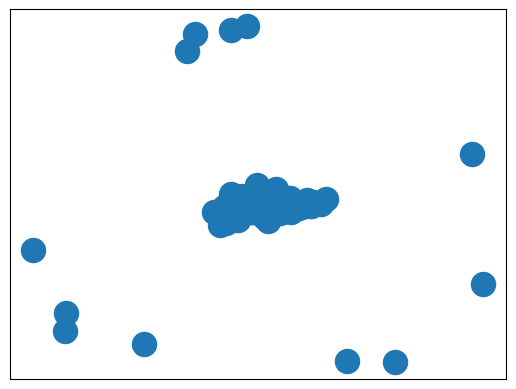

In [28]:
print(G)
#networkInfo(G)
print("Average degree:", averageDegree(G))
nx.draw_networkx(G, with_labels=False)

In [29]:
start_time = time.time()
louvainComs = algorithms.louvain(G)
t = time.time() - start_time
print("Execution time: %.6s seconds" % (t))

coms = list(louvainComs.to_node_community_map().values())[-1][0]+1
print("Number of communities:", coms)
ACS = evaluation.size(G, louvainComs)
print("Average Community Size:", ACS[2])
AID = evaluation.average_internal_degree(G, louvainComs)
print("Average Internal Degree:", AID[2])

NG_Mod = evaluation.newman_girvan_modularity(G, louvainComs)
print("Newman-Girvan Modularity:", NG_Mod[2])
ER_Mod = evaluation.erdos_renyi_modularity(G, louvainComs)
print("Erdos-Renyi Modularity:", ER_Mod[2])
Z_Mod = evaluation.z_modularity(G, louvainComs)
print("Z-Modularity:", Z_Mod[2])
Link_Mod = evaluation.link_modularity(G, louvainComs)
print("Link Modularity:", Link_Mod[2])
significance = evaluation.significance(G, louvainComs)
print("Significance:", significance[2])
print()

Execution time: 4.3418 seconds
Number of communities: 17
Average Community Size: 86.23529411764706
Average Internal Degree: 54.509105067319595
Newman-Girvan Modularity: 0.1188509773216917
Erdos-Renyi Modularity: 0.15335724578221027
Z-Modularity: 0.24776015702484902
Link Modularity: 0.06855519285372255
Significance: 2641632.6261838763

